In [32]:
import numpy as np
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from matplotlib.colors import LogNorm
from matplotlib import cm

In [2]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [3]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=0, vmax = 0.5)
    ax.set_title("Standard Deviation of Cluster")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [4]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [5]:
z_test_tsne_track_370 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__370.npy")
z_test_tsne_track_369 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")
z_test_tsne_track_369_synoptic = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Latant_Space_Constrained_VAEs/model_graphs/latant_space/2D_PCA_Latent_Space__369.npy")


Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_W_Test.npy")

Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

Text(0.5, 1.0, 'W 500 Labeling for All')

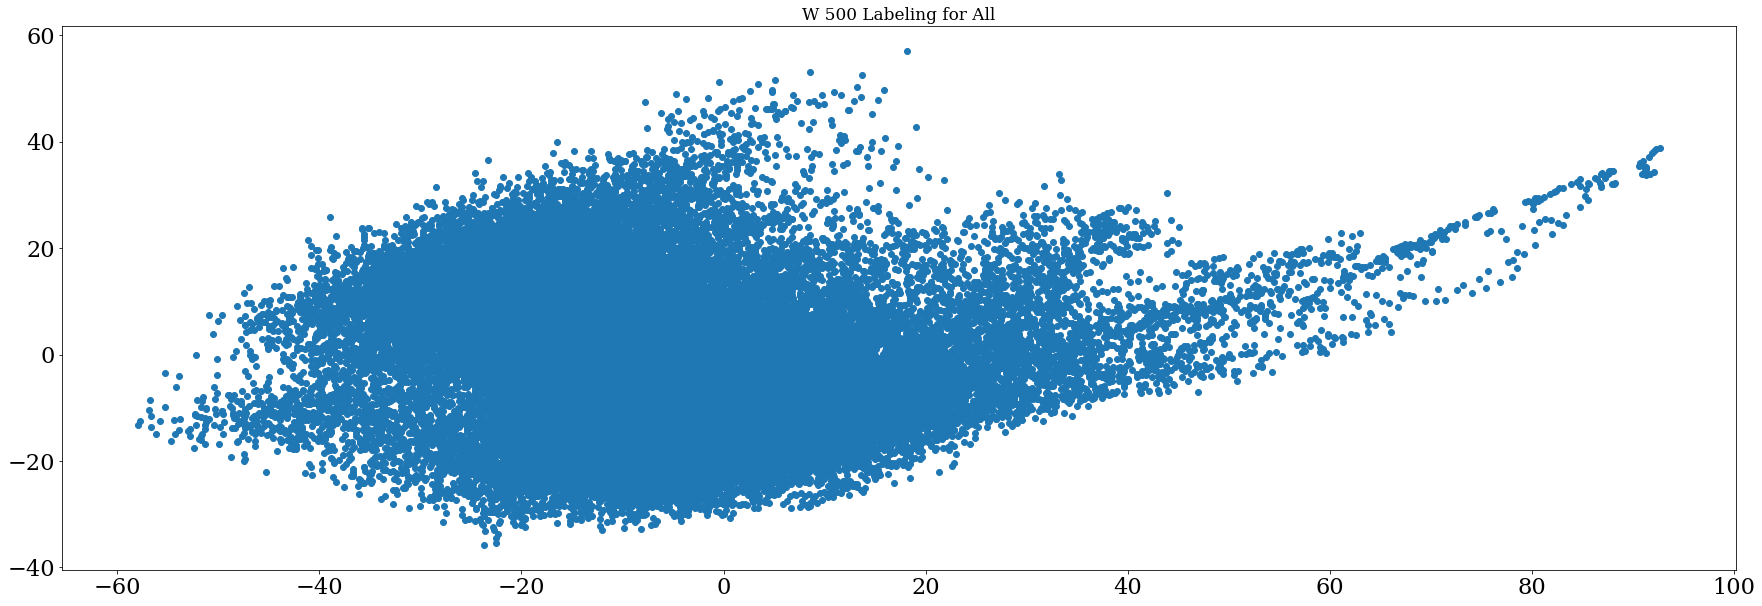

In [6]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track_370[:, 0], y=z_test_tsne_track_370[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

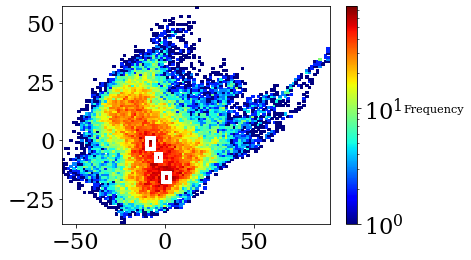

In [29]:
fig, ax = plt.subplots()    
cb = ax.hist2d(z_test_tsne_track_370[:,0], z_test_tsne_track_370[:,1], bins=(100, 100), cmap=plt.cm.jet, norm = LogNorm())
cbar = fig.colorbar(cb[3], ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)
#rect = patches.Rectangle((vx,vy),xdist,ydist,linewidth=4,edgecolor='black',facecolor='none')
rect = patches.Rectangle((-10,-4),4,5,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-5,-9),3,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-1,-18),4,4,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

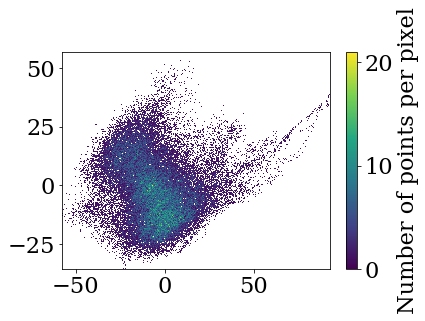

In [54]:
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

    
x = z_test_tsne_track_370[:,0]
y = z_test_tsne_track_370[:,1]
fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

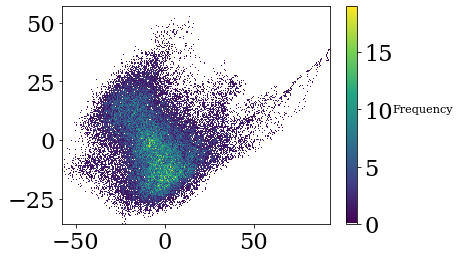

In [55]:
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
cb = ax.scatter_density(z_test_tsne_track_370[:,0], z_test_tsne_track_370[:,1], cmap=white_viridis)
cbar = fig.colorbar(cb, ax=ax)
cbar.set_label(label="Frequency", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)

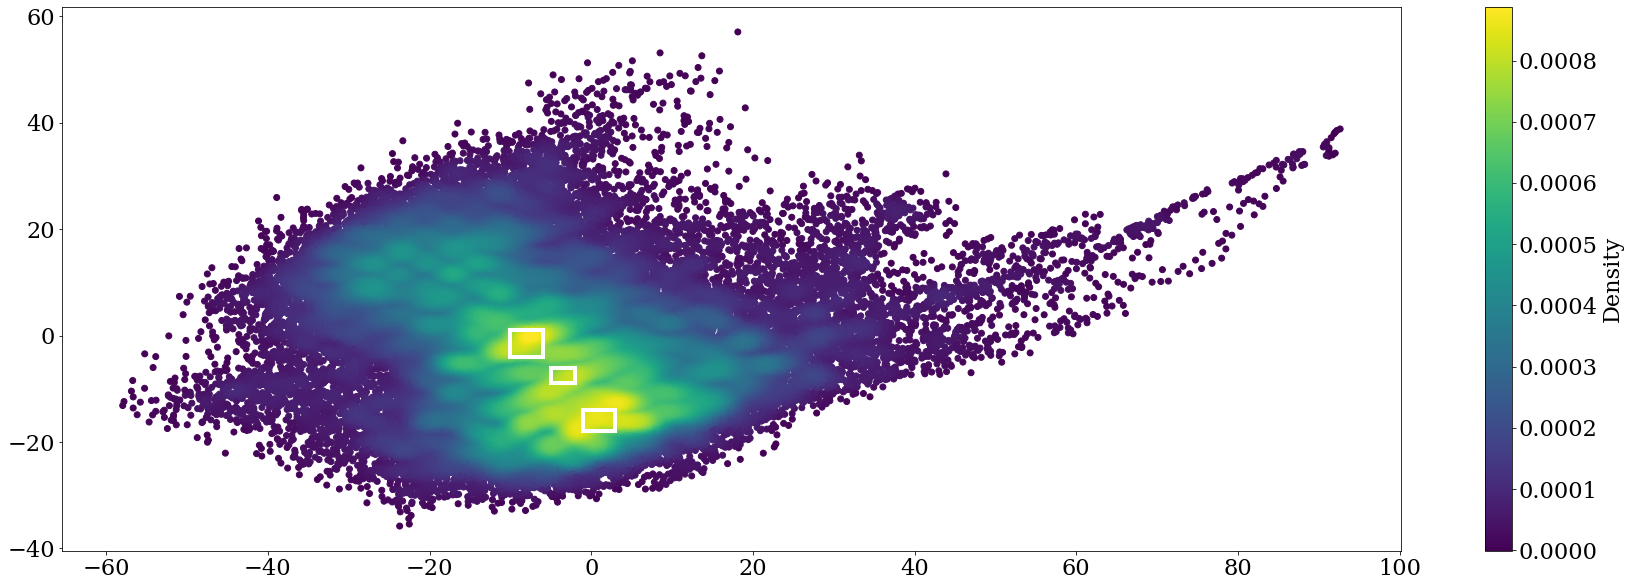

In [56]:
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [50,50],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z)

norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')

rect = patches.Rectangle((-10,-4),4,5,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-5,-9),3,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-1,-18),4,4,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

Text(0.5, 1.0, 'W 500 Labeling for All')

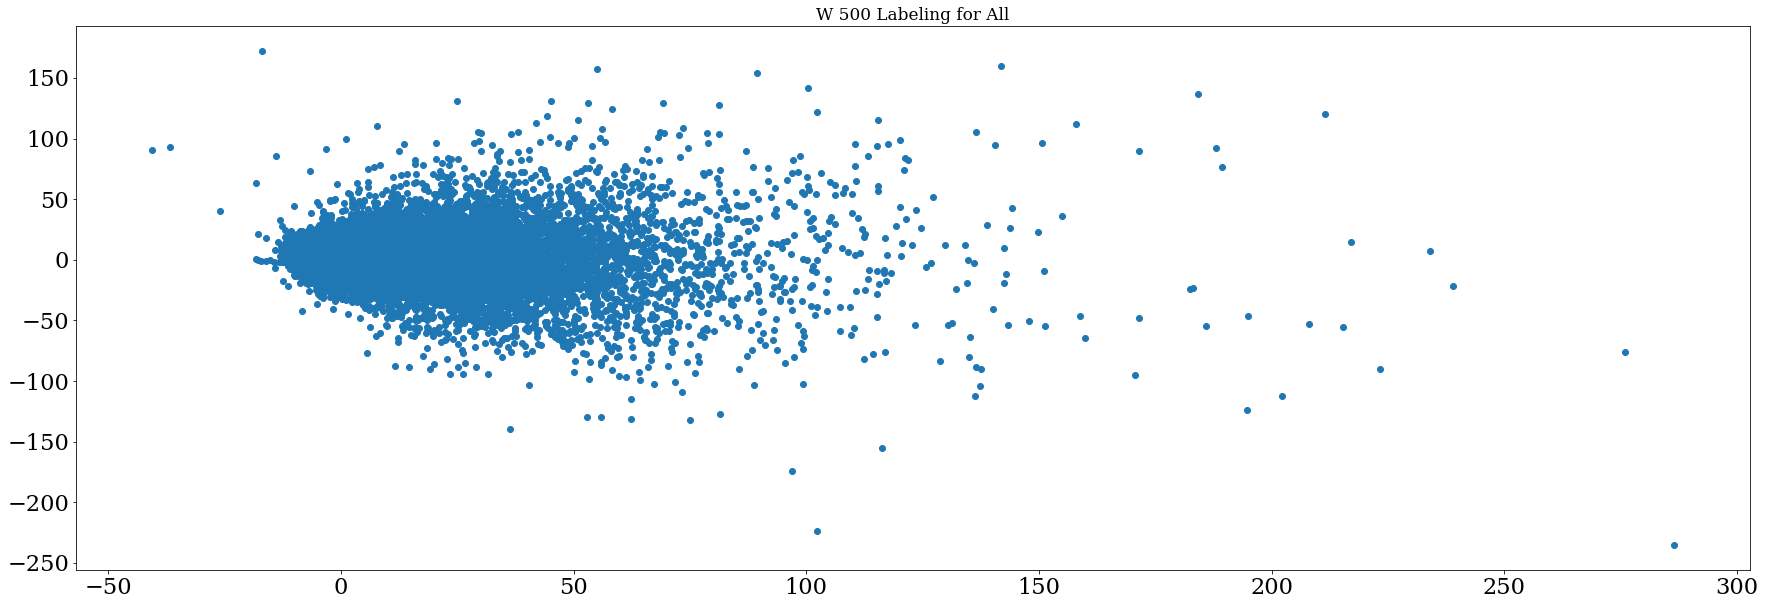

In [46]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track_369[:, 0], y=z_test_tsne_track_369[:, 1])
ax.set_title("W 500 Labeling for All", fontsize = fz*0.75)

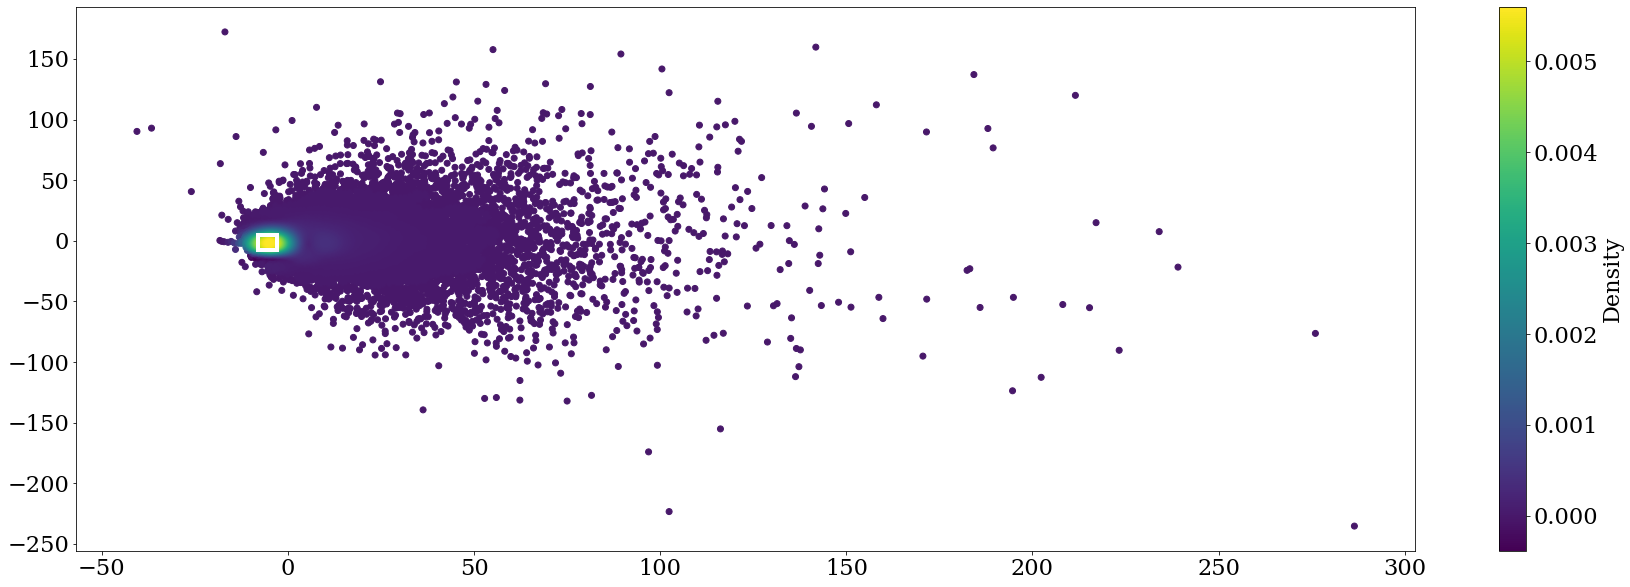

In [61]:
x = z_test_tsne_track_369[:,0]
y = z_test_tsne_track_369[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [50,50],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z)

norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
rect = patches.Rectangle((-8,-8),5,13,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")

In [48]:
z_test_tsne_83 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/PCA_Trials/Covariance_PCA_Mean_Var_Latent_Space__83.npy")

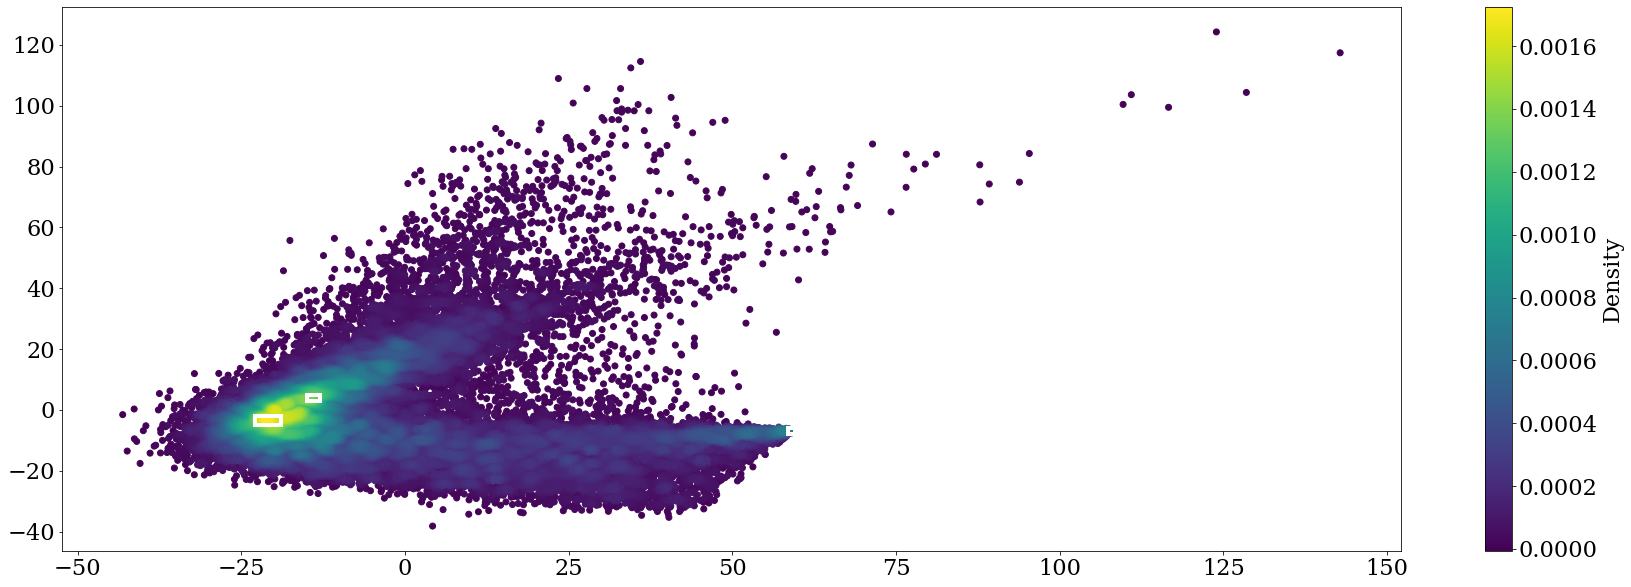

In [62]:
x = z_test_tsne_83[:,0]
y = z_test_tsne_83[:,1]
fig, ax = plt.subplots(figsize=(30,10)) 
data , x_e, y_e = np.histogram2d( x, y, bins = [100,100],  density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

# Sort the points by density, so that the densest points are plotted last

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter( x, y, c=z)

norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
rect = patches.Rectangle((-23,-5),4,3,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((-15,3),2,2,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((58.5,-8),1,2,linewidth=4,edgecolor='white',facecolor='none')
ax.add_patch(rect)
print(" ")